<a href="https://colab.research.google.com/github/swathypk93/swathypk93/blob/main/aerolift_business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving aerofit_treadmill.csv to aerofit_treadmill.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("aerofit_treadmill.csv")


In [ ]:

print("Shape of the dataset:", df.shape)


Shape of the dataset: (180, 9)


In [ ]:
print(df.shape)
print(df.info())
df.head()
df.describe(include='all')
df.isnull().sum()


(180, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
print(df.shape)
print(df.info())
df.head()
df.describe(include='all')
df.isnull().sum()


(180, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
categorical_cols = ['Product', 'Gender', 'MaritalStatus']
for col in categorical_cols:
    df[col] = df[col].astype('category')


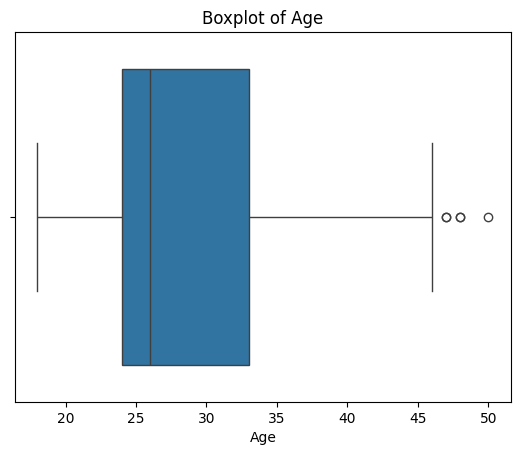

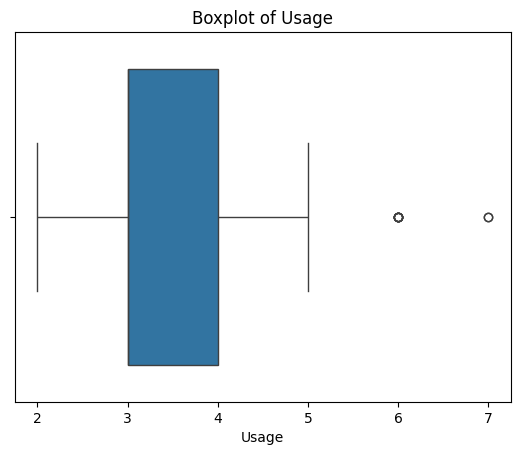

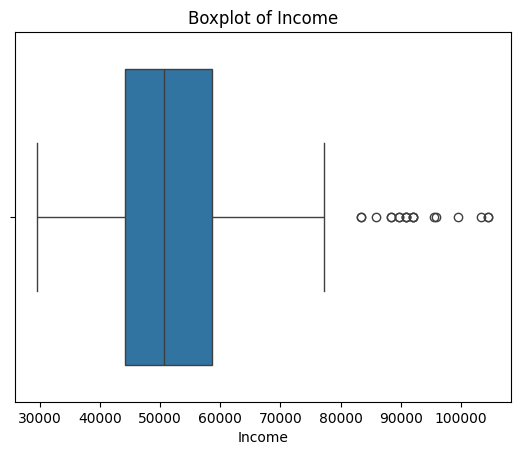

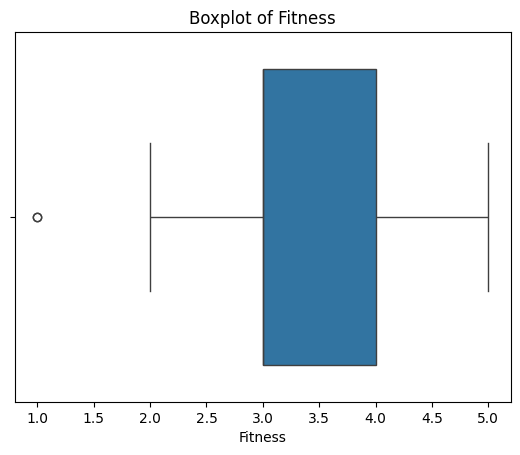

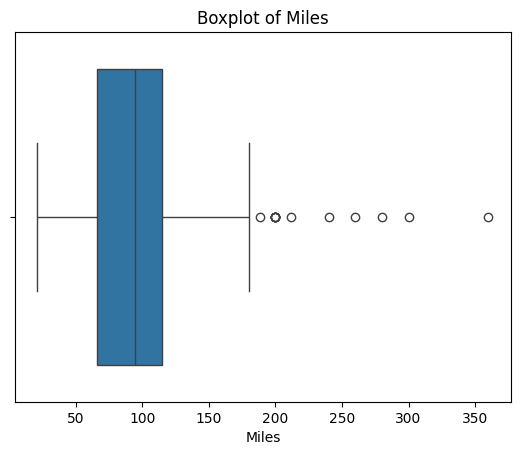

In [ ]:
for col in ['Age', 'Usage', 'Income', 'Fitness', 'Miles']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
for col in ['Age', 'Usage', 'Income', 'Fitness', 'Miles']:
    q5 = df[col].quantile(0.05)
    q95 = df[col].quantile(0.95)
    df[col] = np.clip(df[col], q5, q95)


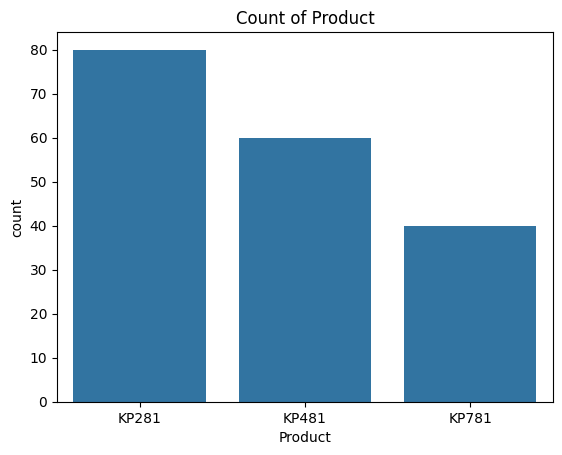

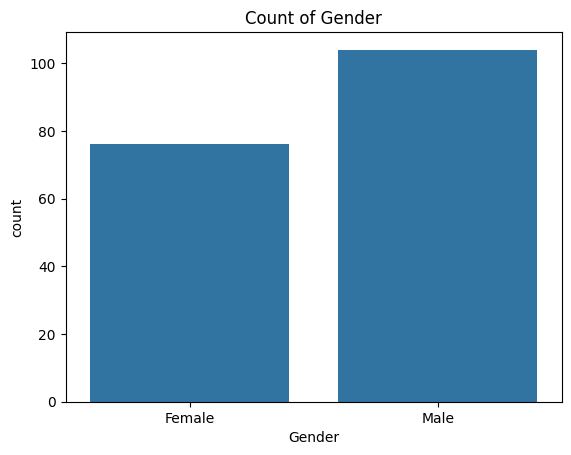

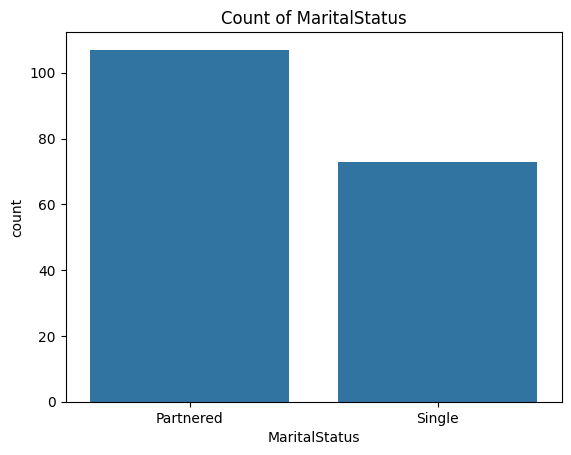

In [ ]:
for col in ['Product', 'Gender', 'MaritalStatus']:
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()


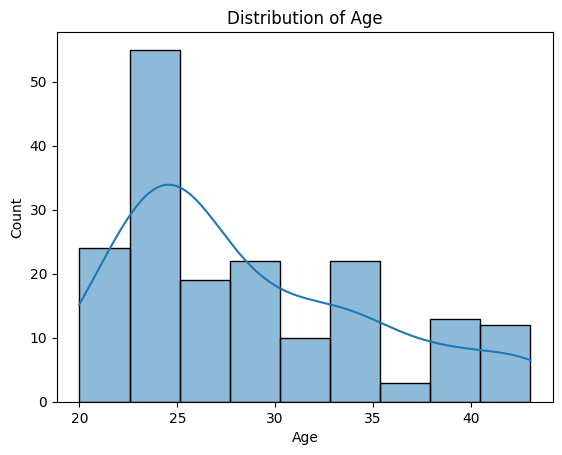

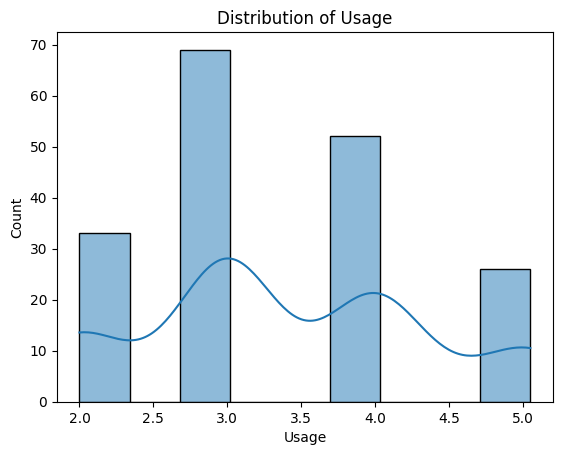

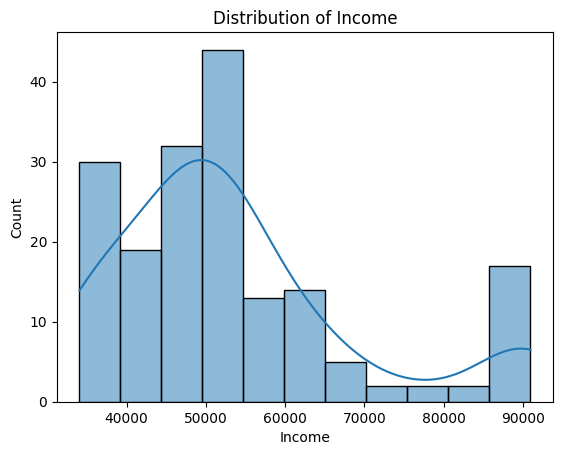

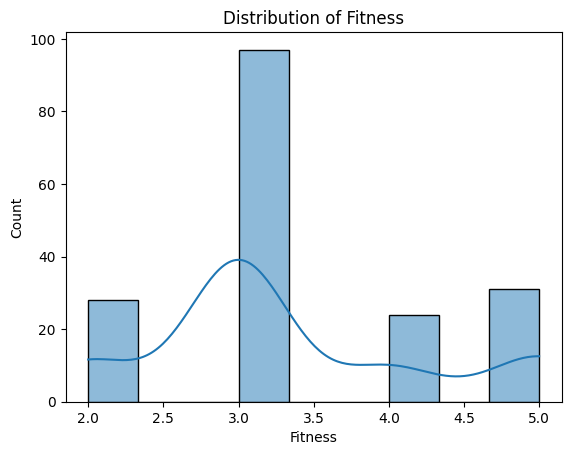

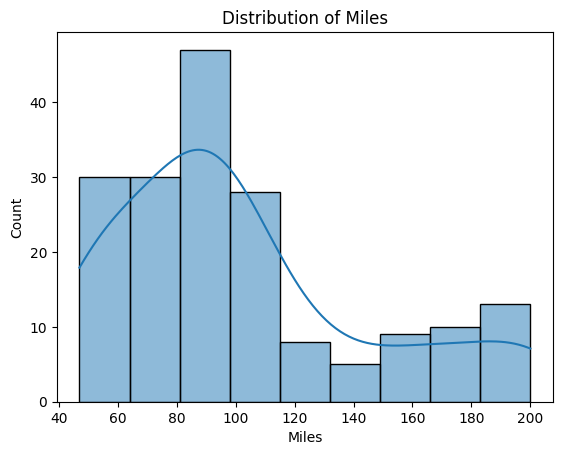

In [ ]:
for col in ['Age', 'Usage', 'Income', 'Fitness', 'Miles']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


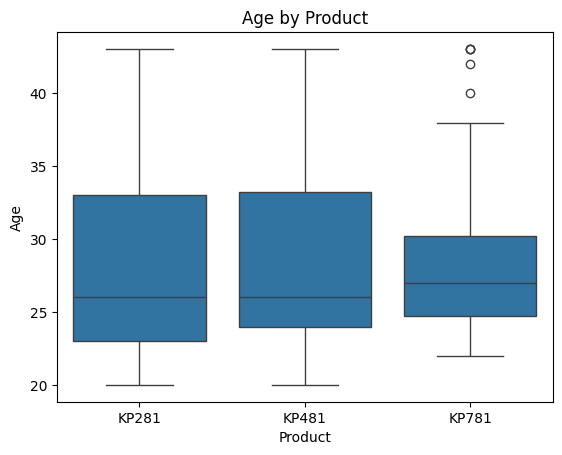

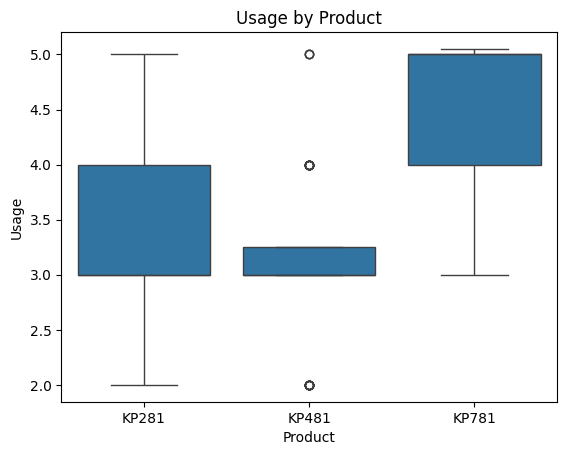

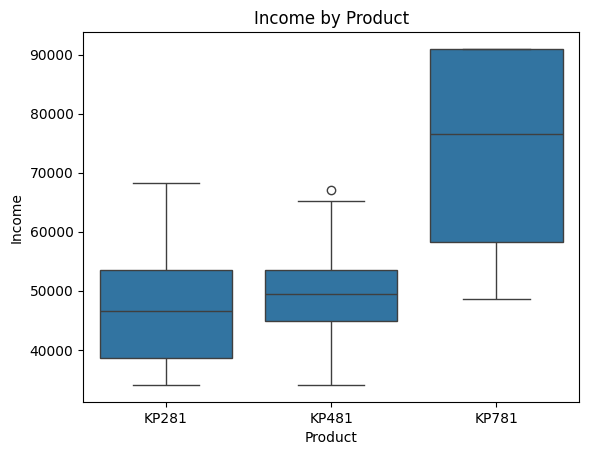

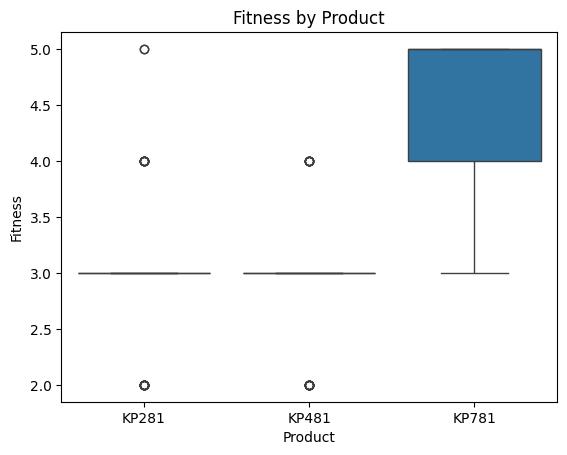

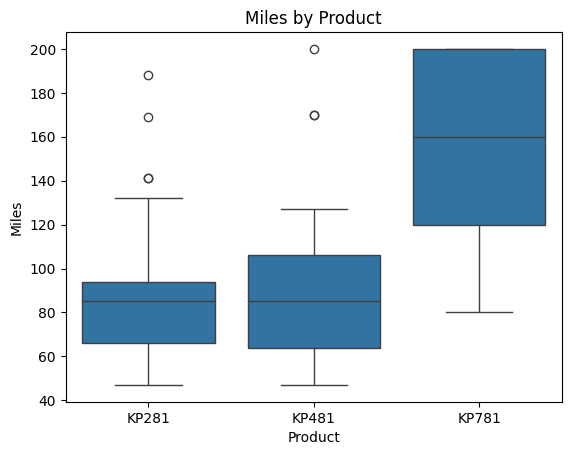

In [ ]:
for col in ['Age', 'Usage', 'Income', 'Fitness', 'Miles']:
    sns.boxplot(x='Product', y=col, data=df)
    plt.title(f'{col} by Product')
    plt.show()


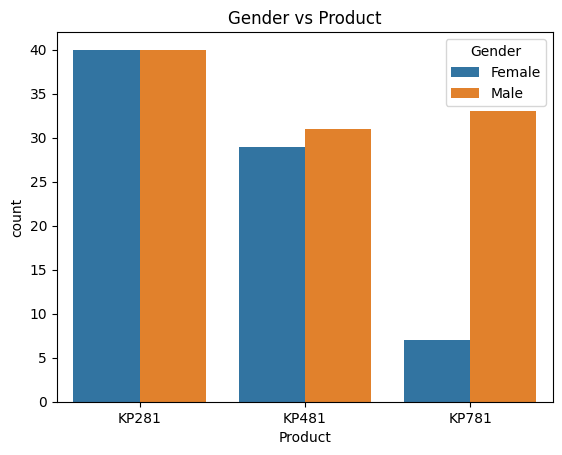

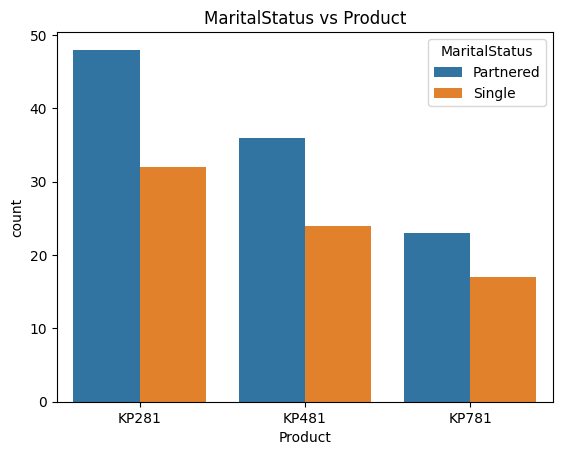

In [ ]:
for col in ['Gender', 'MaritalStatus']:
    sns.countplot(x='Product', hue=col, data=df)
    plt.title(f'{col} vs Product')
    plt.show()


In [ ]:
df['Product'].value_counts(normalize=True)  # gives % of each product


,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


In [ ]:
pd.crosstab(df['Product'], df['Gender'], normalize='columns')
pd.crosstab(df['Gender'], df['Product'], normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


In [ ]:
# P(KP781 | Male)
prob = pd.crosstab(df['Gender'], df['Product'], normalize='index').loc['Male', 'KP781']
print(f"P(KP781 | Male): {prob:.2f}")


P(KP781 | Male): 0.32


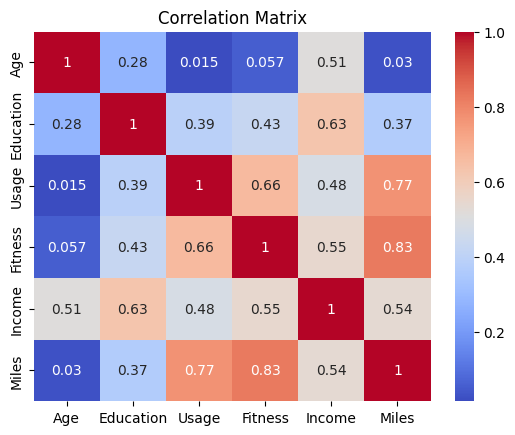

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


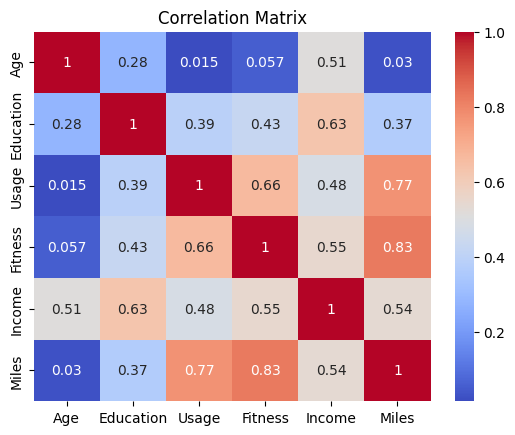

In [ ]:
)


In [ ]:
df.groupby('Product')[['Age', 'Income', 'Fitness', 'Miles']].describe()


<ipython-input-26-241af42dd9ad>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Product')[['Age', 'Income', 'Fitness', 'Miles']].describe()


Age                                                       Income  \
        count       mean       std   min    25%   50%    75%    max  count   
Product                                                                      
KP281    80.0  28.427500  6.678313  20.0  23.00  26.0  33.00  43.05   80.0   
KP481    60.0  28.801667  6.327830  20.0  24.00  26.0  33.25  43.05   60.0   
KP781    40.0  28.828750  6.296182  22.0  24.75  27.0  30.25  43.05   40.0   

                      ... Fitness      Miles                                   \
                mean  ...     75%  max count     mean        std   min    25%   
Product               ...                                                       
KP281    46584.31125  ...     3.0  5.0  80.0   83.125  28.391198  47.0   66.0   
KP481    49046.60750  ...     3.0  4.0  60.0   88.500  31.322543  47.0   64.0   
KP781    73908.28125  ...     5.0  5.0  40.0  155.900  39.073763  80.0  120.0   

                              
           50%    75%    max  
Product                       
KP281     85.0   94.0  188.0  
KP481     85.0  106.0  200.0  
KP781    160.0  200.0  200.0  

[3 rows x 32 columns]

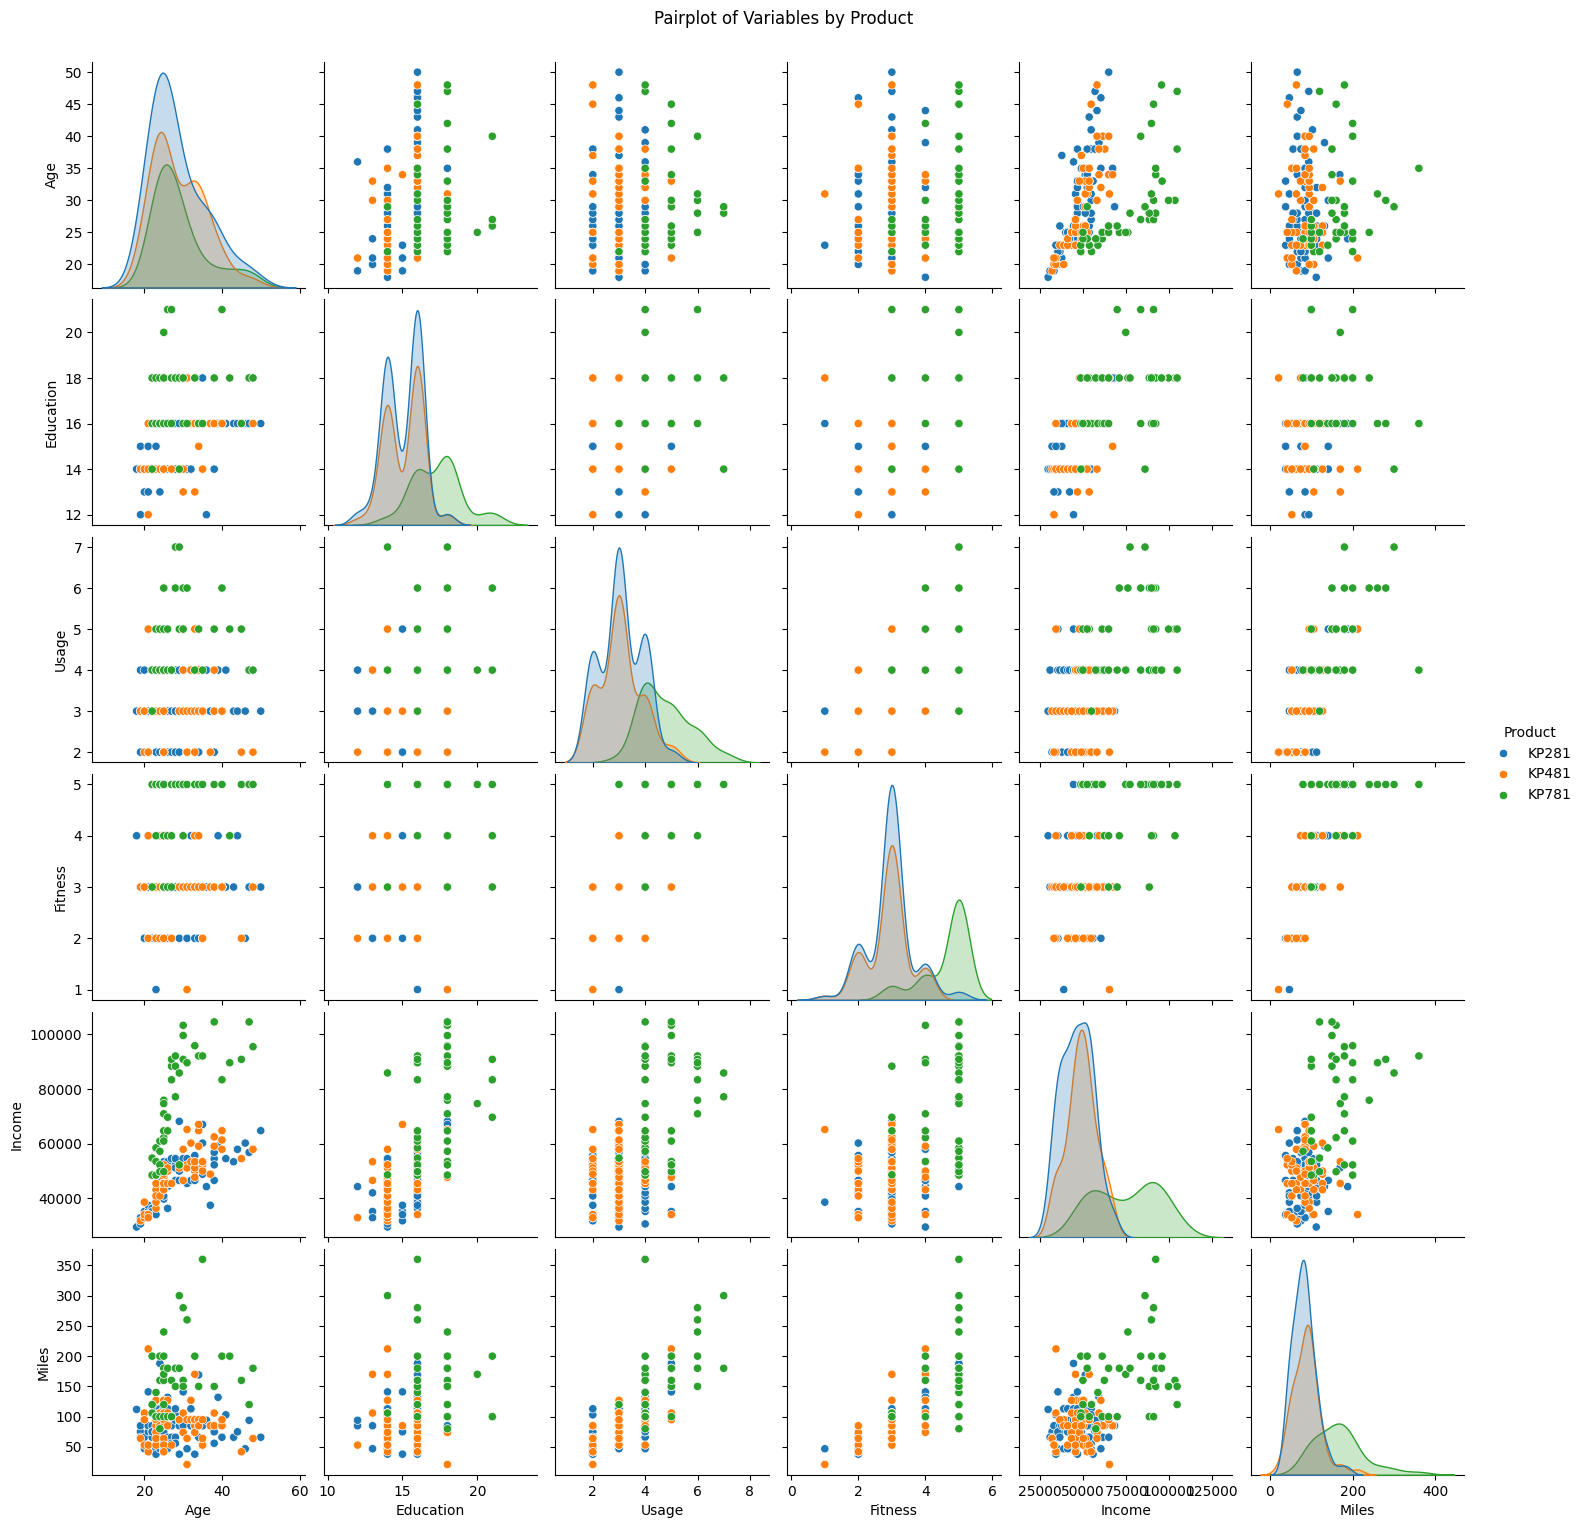

In [ ]:
sns.pairplot(df, hue='Product')
plt.suptitle("Pairplot of Variables by Product", y=1.02)
plt.show()


In [ ]:

prob = pd.crosstab(df['Gender'], df['Product'], normalize='index').loc['Female', 'KP481']
print(f"P(KP481 | Female): {prob:.2f}")


P(KP481 | Female): 0.38


    Business Insights
   1: Product Popularity
    Most customers prefer the KP281 treadmill (44.4%), showing a clear tilt toward affordable, entry-level equipment. KP481 has decent traction (33.3%), while the premium KP781 lags behind (22.2%). This tells us that customers are quite price-conscious. High-end products appeal to a smaller, niche audience. These trends can help Aerofit optimize their inventory, pricing, and sales efforts by focusing more on what sells and where to position each product.

   2: Gender-Based Preference
    Men are far more likely to buy the high-end KP781 compared to women. Around 32% of male buyers go for KP781, while women prefer the lower-priced KP281 and KP481 models. This difference could be due to income, fitness goals, or usage needs.
    
   3: Income and Fitness Trends
    People who buy KP781 tend to earn more—around $73,900—and also rate their fitness higher, averaging 4.7 out of 5. KP281 customers have lower incomes, around $46,500, and their fitness levels are moderate. This shows that the pricier treadmill appeals to serious fitness enthusiasts who can afford premium equipment. Aerofit can use this to target potential KP781 customers based on both income and health consciousness.

   4: Usage Behavior
    KP781 users work out frequently—up to 6 times a week—and expect to cover over 150 miles weekly. In contrast, KP281 buyers use their treadmills less often and for shorter distances. This pattern shows that advanced models are used by people committed to high-level fitness, while entry-level buyers are more casual users. This reinforces that Aerofit’s product line-up is well-aligned with different customer needs.

   5: Age Distribution
    Treadmill buyers are mostly aged between 20 and 40. Younger users (early 20s) lean toward KP281, while slightly older ones (late 20s to 30s) prefer KP781. This reflects how life stage and income influence buying choices. As customers grow older and more financially stable, they tend to invest in higher-end products. Aerofit should segment their campaigns by age group to better connect with the right buyers.

 Recommendations

   1: Tiered Customer Profiles
    Aerofit should divide their customers into three main groups: budget seekers (KP281), mid-range users (KP481), and high-end buyers (KP781). Each group should get customized messages based on their age, income, and fitness goals. This way, marketing feels more personal and relevant. It's better than sending the same promotion to everyone—targeted outreach means better results.

   2: Gender-Focused Campaigns
    Since women lean toward KP281 and KP481, Aerofit could highlight features like safety, design, and compact size in campaigns aimed at them. For men, emphasize power, performance, and durability—especially for KP781. By aligning promotions with what each gender tends to value, Aerofit can connect better with buyers and improve sales.

  3: Fitness App Partnerships
    Since KP781 buyers are fitness-focused, Aerofit can partner with health apps or offer free access to fitness tools with each purchase. This not only adds value but strengthens brand image as premium and high-tech. It can also help gather useful data for future campaigns, giving Aerofit an edge in personalizing offers.

 4: Easy Financing for KP781
    The KP781’s high price might hold some people back. Aerofit can make it more accessible by offering 0% EMI plans or referral discounts. This could help attract young professionals with good income but limited savings. Making premium products affordable without lowering their value can open the door for more sales.

   5: Beginner Support with KP281
    First-time buyers of KP281 could benefit from a starter pack—like a workout plan, training videos, or virtual fitness support. This adds value and encourages them to stick to a fitness routine. It also builds loyalty, as customers feel supported beyond just the purchase. It’s a small effort that could lead to long-term customer engagement.

